In [11]:
import pandas as pd
from google.cloud import aiplatform
from google.protobuf import json_format
import matplotlib.pyplot as plt

In [14]:
# Combine all 40 Consumer behavior datasets 
df_cb = []
df_1 = pd.DataFrame()
for i in range(40):
  print(i)
  if(i<10):
    df_cb = pd.read_csv('gs://saharadata6/consumer_behavior_00000000000'+str(i)+'.csv', error_bad_lines=False)
    df_1 = df_1.append(df_cb)
  else:
    df_cb = pd.read_csv('gs://saharadata6/consumer_behavior_0000000000'+str(i)+'.csv',  error_bad_lines=False)
    df_1 = df_1.append(df_cb)

0


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


1
2
3
4
5
6
7
8
9
10
11


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (1,2,3,5,8,13,14,15,16,17,18,35,48,50,63,64,65,66,67,68,83,84,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12
13
14
15
16
17


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (2,8,9,10,11,24,25,26,44,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


18


b'Skipping line 271840: expected 144 fields, saw 196\n'


19
20


b'Skipping line 6043: expected 144 fields, saw 177\n'


21


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (33,34,35,36,50,51,53,54,69,70,71,75,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


22
23
24


b'Skipping line 271825: expected 144 fields, saw 230\n'
b'Skipping line 277696: expected 144 fields, saw 224\n'


25


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (38,48,50,51,65,68,74,80,81,82,83,96,97,98,99,100,101,116,117,118,122,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


26


b'Skipping line 278305: expected 144 fields, saw 147\n'


27
28
29


b'Skipping line 277590: expected 144 fields, saw 168\n'
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (72,73,74,78,80) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


30


b'Skipping line 5778: expected 144 fields, saw 216\n'


31


b'Skipping line 278406: expected 144 fields, saw 214\n'


32
33
34


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (3,5,6,9,14,15,16,17,18,19,21,22,23,33,36,38,40,44,48,50,51,64,65,66,67,68,69,84,86,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


35


b'Skipping line 6136: expected 144 fields, saw 163\n'


36


b'Skipping line 278127: expected 144 fields, saw 147\n'


37
38
39


b'Skipping line 271809: expected 144 fields, saw 208\n'
b'Skipping line 277593: expected 144 fields, saw 192\n'


In [16]:
# Upload the combined dataset
df_1.to_csv('gs://saharadata6/combined_data.csv', index=False)

In [28]:
# Check the shape of the entire dataset (11.1M values to 8.17M after dropping duplicates)
df_1 = df_1.drop_duplicates()
df_1.shape

(8177223, 144)

In [29]:
# Quick check
df_1.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,PRESENCE_OF_CHILDREN,SD_ADULTS_IN_HH,AGE_GROUP,SD_CHILDREN_IN_HH,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,SD_PEOPLE_IN_HH,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,CHANGE_IN_HOME_VALUE_12MO,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOME_AGE,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL
0,IND_000028457,60137,1,3,Y,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,Y,1,5,1,6,7,7,N,N,N,N,N,Caucasian-Other,2,1,2,2,U,1.0,18-24,NaN,Graduate Degree,Male,16,NaN,N,N,N,0.0,$61K - $80K,1,3,N,5,6,7.0,17675.0,N,Y,N,Y,N,N,6,3,5,2,6,6,6.0,7.0,7.0,4.0,2.0,47.0,0.0,N,7.0,32.0,R2,7.0,7.0,7.0,4,7,Y,1973.0,1225.0,1087.0,6,5,N,Y,Y,Y,7.0,6.0,7.0,7.0,5.0,7.0,2.0,6.0,5.0,7.0,4.0,7.0,Y,N,N,N,Y,Y,2.0,2.0,2.0,2.0,2.0,3.0,3.0,6.0,7.0,7.0,1.0,7.0,5.0,1.0,N,N,N,1.0,1.0,6.0,N,N,N,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0
1,IND_000028565,72212,1,4,N,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,N,7,4,2,7,7,6,Y,N,N,N,N,Hispanic,3,7,5,3,Y,1.0,25-34,2.0,Bachelor Degree,Female,0,3.0,N,N,N,-7.0,$61K - $80K,3,4,N,6,3,7.0,11022.0,Y,N,Y,Y,N,N,6,3,4,2,1,6,7.0,7.0,5.0,7.0,2.0,40.0,220.0,N,6.0,45.0,H1,5.0,4.0,4.0,7,6,Y,1166.0,533.0,733.0,4,1,N,N,N,Y,5.0,4.0,5.0,4.0,4.0,7.0,7.0,4.0,2.0,6.0,3.0,6.0,Y,N,N,N,Y,N,2.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,6.0,5.0,6.0,N,N,N,5.0,4.0,4.0,N,N,N,5.0,6.0,508.0,808.0,392.0,1708.0,3.0,2.0
2,IND_000028638,60021,4,6,Y,1,3,2,4,6,2,7,4,5,2,4,7,4,7,5,Y,2,5,2,6,7,7,N,Y,N,Y,Y,Caucasian-Other,5,6,6,3,Y,2.0,18-24,3.0,HS Degree,Male,8,5.0,N,N,Y,0.0,$81K - $100K,1,4,Y,5,3,5.0,16365.0,N,Y,N,Y,N,N,6,6,5,3,5,6,5.0,7.0,7.0,5.0,2.0,35.0,158.0,N,5.0,65.0,H1,7.0,5.0,5.0,7,6,Y,1826.0,1134.0,1006.0,2,3,N,Y,Y,Y,6.0,7.0,7.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,6.0,5.0,Y,N,Y,Y,Y,N,4.0,2.0,4.0,3.0,2.0,3.0,4.0,5.0,6.0,6.0,1.0,7.0,6.0,6.0,N,N,N,1.0,7.0,

In [30]:
# Check all columns 
df_1.columns.values

array(['REC_ID', 'ZIP5', 'AUTO_AGE', 'AUTO_AVG_MILEAGE',
       'AUTOMOTIVE_BUFF_V2', 'CHANNELSD_BANNER_SCALE',
       'CHANNELSD_INTERTV_SCALE', 'LT_TV_DAILY_VIEWING_V2',
       'SMARTPHONE_ANDROID_SCALE', 'SMARTPHONE_IPHONE_SCALE',
       'SMARTPHONE_NONE_SCALE', 'SOCIALSD_DEAL_SITE',
       'SOCIALSD_FACEBOOK_V2', 'SOCIALSD_INSTAGRAM_V2',
       'SOCIALSD_LINKEDIN_V2', 'SOCIALSD_PINTEREST', 'SOCIALSD_SNAPCHAT',
       'SOCIALSD_TRIP_ADVISOR', 'SOCIALSD_TUMBLR', 'SOCIALSD_TWITTER',
       'TV_CABLE_V2', 'TV_FAVORITES_HOME_IMP', 'TV_FAVORITES_LIVE_SPORTS',
       'TV_FAVORITES_NEWS', 'TV_STREAMING_SERV_MANY',
       'TV_VIEWER_EMPATHIZER', 'YOUTUBE_CREATOR', 'CHILDREN_AGED_0_2',
       'CHILDREN_AGED_11_15', 'CHILDREN_AGED_16_17', 'CHILDREN_AGED_3_5',
       'CHILDREN_AGED_6_10', 'ETHNICSD_V2', 'LT_CAT_OWNER_V2',
       'LT_DOG_OWNER_V2', 'LT_PET_OWNER_V2', 'LT_SENIOR_ADULT_IN_HH_V2',
       'PRESENCE_OF_CHILDREN', 'SD_ADULTS_IN_HH', 'AGE_GROUP',
       'SD_CHILDREN_IN_HH', 'SD_EDUCAT

In [26]:
# Display All
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [31]:
df_1.isnull().sum()

REC_ID                    0
ZIP5                      0
AUTO_AGE                  0
AUTO_AVG_MILEAGE          0
AUTOMOTIVE_BUFF_V2        0
                         ..
SPENDEX_TRAVEL_DOM_V2     7
SPENDEX_TRAVEL_INTL_V2    7
SPENDEX_TRAVEL_V2         7
TRAVELPROP_DOMESTIC       7
TRAVELPROP_INTL           7
Length: 144, dtype: int64

In [32]:
# Get in the results dataset
df_res = pd.read_csv("gs://saharadata6/use_case3.zip")

In [35]:
# Drop Duplicates
df_res.drop_duplicates(inplace = True)
df_res.shape

(8166070, 2)

In [36]:
## Combining the consumer and results datasets
df_comb = pd.merge(df_2, df_res, how = 'inner', on = "REC_ID")

In [43]:
# Quick check on the combined dataset
df_comb.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,PRESENCE_OF_CHILDREN,SD_ADULTS_IN_HH,AGE_GROUP,SD_CHILDREN_IN_HH,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,SD_PEOPLE_IN_HH,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,CHANGE_IN_HOME_VALUE_12MO,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOME_AGE,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL,Cluster
0,IND_000028457,60137,1,3,Y,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,Y,1,5,1,6,7,7,N,N,N,N,N,Caucasian-Other,2,1,2,2,U,1.0,18-24,NaN,Graduate Degree,Male,16,NaN,N,N,N,0.0,$61K - $80K,1,3,N,5,6,7.0,17675.0,N,Y,N,Y,N,N,6,3,5,2,6,6,6.0,7.0,7.0,4.0,2.0,47.0,0.0,N,7.0,32.0,R2,7.0,7.0,7.0,4,7,Y,1973.0,1225.0,1087.0,6,5,N,Y,Y,Y,7.0,6.0,7.0,7.0,5.0,7.0,2.0,6.0,5.0,7.0,4.0,7.0,Y,N,N,N,Y,Y,2.0,2.0,2.0,2.0,2.0,3.0,3.0,6.0,7.0,7.0,1.0,7.0,5.0,1.0,N,N,N,1.0,1.0,6.0,N,N,N,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0,0
1,IND_000028565,72212,1,4,N,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,N,7,4,2,7,7,6,Y,N,N,N,N,Hispanic,3,7,5,3,Y,1.0,25-34,2.0,Bachelor Degree,Female,0,3.0,N,N,N,-7.0,$61K - $80K,3,4,N,6,3,7.0,11022.0,Y,N,Y,Y,N,N,6,3,4,2,1,6,7.0,7.0,5.0,7.0,2.0,40.0,220.0,N,6.0,45.0,H1,5.0,4.0,4.0,7,6,Y,1166.0,533.0,733.0,4,1,N,N,N,Y,5.0,4.0,5.0,4.0,4.0,7.0,7.0,4.0,2.0,6.0,3.0,6.0,Y,N,N,N,Y,N,2.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,6.0,5.0,6.0,N,N,N,5.0,4.0,4.0,N,N,N,5.0,6.0,508.0,808.0,392.0,1708.0,3.0,2.0,0
2,IND_000028638,60021,4,6,Y,1,3,2,4,6,2,7,4,5,2,4,7,4,7,5,Y,2,5,2,6,7,7,N,Y,N,Y,Y,Caucasian-Other,5,6,6,3,Y,2.0,18-24,3.0,HS Degree,Male,8,5.0,N,N,Y,0.0,$81K - $100K,1,4,Y,5,3,5.0,16365.0,N,Y,N,Y,N,N,6,6,5,3,5,6,5.0,7.0,7.0,5.0,2.0,35.0,158.0,N,5.0,65.0,H1,7.0,5.0,5.0,7,6,Y,1826.0,1134.0,1006.0,2,3,N,Y,Y,Y,6.0,7.0,7.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,6.0,5.0,Y,N,Y,Y,Y,N,4.0,2.0,4.0,3.0,2.0,3.0,4.0,5.0,6.0,6.0,1.0,7.0,6.0,6.0,N,

In [42]:
# Shape of the combined final
df_comb.shape

(8177219, 145)

In [65]:
# Exploratory Analysis on Clusters
counts = df_comb['Cluster'].value_counts()
counts

0    4386084
2    1619721
5    1229100
4     534246
3     367745
1      40323
Name: Cluster, dtype: int64

In [47]:
# Calculate the percentage of records for each cluster
total_records = len(df_comb)
cluster_percentages = (counts / total_records) * 100
cluster_percentages

0    53.637844
2    19.807724
5    15.030782
4     6.533346
3     4.497189
1     0.493114
Name: Cluster, dtype: float64

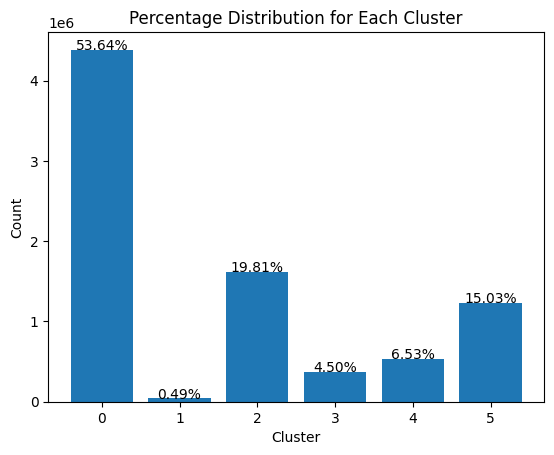

In [215]:
# Create a bar plot
fig, ax = plt.subplots()
ax.bar(cluster_percentages.index, counts)

# Set the axis labels and chart title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Percentage Distribution for Each Cluster')

ax.text(0, counts[0]+0.5, f'{cluster_percentages[0]:.2f}%', ha='center')
ax.text(1, counts[1]+0.5, f'{cluster_percentages[1]:.2f}%', ha='center')
ax.text(2, counts[2]+0.5, f'{cluster_percentages[2]:.2f}%', ha='center')
ax.text(3, counts[3]+0.5, f'{cluster_percentages[3]:.2f}%', ha='center')
ax.text(4, counts[4]+0.5, f'{cluster_percentages[4]:.2f}%', ha='center')
ax.text(5, counts[5]+0.5, f'{cluster_percentages[5]:.2f}%', ha='center')

# Show the plot
plt.show()

In [55]:
#Finding the null values

def missing_percent(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_percent = 100 * data.isnull().sum() / len(data)
        
        #Identifyig the data type
        data_type = data.dtypes
        
        # Make a table with the results
        mis_table = pd.concat([mis_val, mis_percent, data_type], axis=1)
        
        # Rename the columns
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values', 2: 'Data Type'})
        
        # Sort the table by percentage of missing descending
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_columns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
missing_percent(df_comb)

Your selected dataframe has 145 columns.
There are 93 columns that have missing values.


,Missing Values,Percent of Total Values,Data Type
SD_CHILDREN_IN_HH,3776887,46.19,object
SD_PEOPLE_IN_HH,3776887,46.19,object
SD_HOME_AGE,1495999,18.29,object
CHANGE_IN_HOME_VALUE_12MO,386661,4.73,object
SD_ADULTS_IN_HH,20970,0.26,object
CHANGE_IN_INCOME_12MO,4,0.00,object
LT_HUNTING_SHOOTING_FAN_V2,3,0.00,float64
JOBSSD_BLUE_COLLAR,3,0.00,float64
SD_BUSINESS_OWNER_V2,3,0.00,float64
JOBSSD_STUDENT,3,0.00,float64


In [77]:
#Dropping features with maximum null values (5)
df_comb = df_comb.drop(['SD_ADULTS_IN_HH', 'SD_CHILDREN_IN_HH', 'SD_PEOPLE_IN_HH', 'CHANGE_IN_HOME_VALUE_12MO', 'SD_HOME_AGE'], axis=1)

In [79]:
## Check the matrix dimensions after dropping
df_comb.shape

(8177219, 140)

In [80]:
# Check for all NA values
df_comb.isna().any(axis=1).sum()

7

In [87]:
# Check all features which are strings

dtypes = df_comb.dtypes

string_cols = [col for col, dtype in dtypes.items() if dtype == 'object']
string_cols

['REC_ID',
 'ZIP5',
 'AUTO_AVG_MILEAGE',
 'AUTOMOTIVE_BUFF_V2',
 'CHANNELSD_BANNER_SCALE',
 'CHANNELSD_INTERTV_SCALE',
 'SMARTPHONE_ANDROID_SCALE',
 'SMARTPHONE_IPHONE_SCALE',
 'SMARTPHONE_NONE_SCALE',
 'SOCIALSD_DEAL_SITE',
 'SOCIALSD_INSTAGRAM_V2',
 'SOCIALSD_LINKEDIN_V2',
 'SOCIALSD_PINTEREST',
 'SOCIALSD_SNAPCHAT',
 'SOCIALSD_TRIP_ADVISOR',
 'SOCIALSD_TUMBLR',
 'SOCIALSD_TWITTER',
 'TV_CABLE_V2',
 'TV_FAVORITES_HOME_IMP',
 'TV_FAVORITES_LIVE_SPORTS',
 'TV_FAVORITES_NEWS',
 'TV_STREAMING_SERV_MANY',
 'TV_VIEWER_EMPATHIZER',
 'YOUTUBE_CREATOR',
 'CHILDREN_AGED_0_2',
 'CHILDREN_AGED_11_15',
 'CHILDREN_AGED_16_17',
 'CHILDREN_AGED_3_5',
 'CHILDREN_AGED_6_10',
 'ETHNICSD_V2',
 'LT_CAT_OWNER_V2',
 'LT_DOG_OWNER_V2',
 'LT_PET_OWNER_V2',
 'LT_SENIOR_ADULT_IN_HH_V2',
 'PRESENCE_OF_CHILDREN',
 'AGE_GROUP',
 'SD_EDUCATION_V2',
 'SD_GENDER',
 'YOUNG_ADULT_IN_HH',
 'CC_NEW_ISSUE',
 'CC_USER',
 'CHANGE_IN_INCOME_12MO',
 'INCOME_GROUP',
 'OS_FIN_IMPCONTROL',
 'OS_FIN_PLANNING',
 'PRESENCE_OF_CC',

In [86]:
#Convert Auto_age to Integers
df_comb['AUTO_AGE'] = df_comb['AUTO_AGE'].astype(int)

In [92]:
df_comb['AUTO_AVG_MILEAGE'].replace('N', 0, inplace=True)
df_comb['AUTO_AVG_MILEAGE'].replace('Y', 1, inplace=True)

In [94]:
df_comb['AUTO_AVG_MILEAGE'] = df_comb['AUTO_AVG_MILEAGE'].astype(int)


In [95]:
df_comb.AUTO_AVG_MILEAGE.unique()

array([3, 4, 6, 1, 5, 2, 7, 0])

In [96]:
df_comb.AUTOMOTIVE_BUFF_V2.unique()

array(['Y', 'N'], dtype=object)

In [97]:
df_comb['AUTOMOTIVE_BUFF_V2'].replace('N', 0, inplace=True)
df_comb['AUTOMOTIVE_BUFF_V2'].replace('Y', 1, inplace=True)

In [98]:
## Converting all [N,Y] to [0,1]

# Create a dictionary to map "N" to 0 and "Y" to 1
mapping_dict = {"N": 0, "Y": 1}

# Replace "N" with 0 and "Y" with 1 in the DataFrame
df_comb = df_comb.replace(mapping_dict)

In [99]:
# Check all features which are strings

dtypes = df_comb.dtypes

string_cols = [col for col, dtype in dtypes.items() if dtype == 'object']
string_cols

['REC_ID',
 'ZIP5',
 'CHANNELSD_BANNER_SCALE',
 'CHANNELSD_INTERTV_SCALE',
 'SMARTPHONE_ANDROID_SCALE',
 'SMARTPHONE_IPHONE_SCALE',
 'SMARTPHONE_NONE_SCALE',
 'SOCIALSD_DEAL_SITE',
 'SOCIALSD_INSTAGRAM_V2',
 'SOCIALSD_LINKEDIN_V2',
 'SOCIALSD_PINTEREST',
 'SOCIALSD_SNAPCHAT',
 'SOCIALSD_TRIP_ADVISOR',
 'SOCIALSD_TUMBLR',
 'SOCIALSD_TWITTER',
 'TV_FAVORITES_HOME_IMP',
 'TV_FAVORITES_LIVE_SPORTS',
 'TV_FAVORITES_NEWS',
 'TV_STREAMING_SERV_MANY',
 'TV_VIEWER_EMPATHIZER',
 'YOUTUBE_CREATOR',
 'CHILDREN_AGED_0_2',
 'CHILDREN_AGED_11_15',
 'CHILDREN_AGED_16_17',
 'CHILDREN_AGED_3_5',
 'CHILDREN_AGED_6_10',
 'ETHNICSD_V2',
 'LT_CAT_OWNER_V2',
 'LT_DOG_OWNER_V2',
 'LT_PET_OWNER_V2',
 'LT_SENIOR_ADULT_IN_HH_V2',
 'PRESENCE_OF_CHILDREN',
 'AGE_GROUP',
 'SD_EDUCATION_V2',
 'SD_GENDER',
 'YOUNG_ADULT_IN_HH',
 'CC_NEW_ISSUE',
 'CC_USER',
 'CHANGE_IN_INCOME_12MO',
 'INCOME_GROUP',
 'OS_FIN_IMPCONTROL',
 'OS_FIN_PLANNING',
 'PRESENCE_OF_CC',
 'REGB_CC_AIRLINE_IM',
 'REGB_FINTECH_DIGITAL',
 'EXERCISE_

In [104]:
df_comb[['CHANNELSD_BANNER_SCALE', 'SMARTPHONE_IPHONE_SCALE',
 'SMARTPHONE_NONE_SCALE',
 'SOCIALSD_DEAL_SITE',
 'SOCIALSD_INSTAGRAM_V2',
 'SOCIALSD_LINKEDIN_V2',
 'SOCIALSD_PINTEREST',
 'SOCIALSD_SNAPCHAT',
 'SOCIALSD_TRIP_ADVISOR',
 'SOCIALSD_TUMBLR',
 'SOCIALSD_TWITTER',
 'TV_FAVORITES_HOME_IMP',
 'TV_FAVORITES_LIVE_SPORTS',
 'TV_FAVORITES_NEWS',
 'TV_STREAMING_SERV_MANY',
 'TV_VIEWER_EMPATHIZER',
 'YOUTUBE_CREATOR',
 'CHILDREN_AGED_0_2',
 'CHILDREN_AGED_11_15',
 'CHILDREN_AGED_16_17',
 'CHILDREN_AGED_3_5',
 'CHILDREN_AGED_6_10']] = df_comb[['CHANNELSD_BANNER_SCALE', 'SMARTPHONE_IPHONE_SCALE',
 'SMARTPHONE_NONE_SCALE',
 'SOCIALSD_DEAL_SITE',
 'SOCIALSD_INSTAGRAM_V2',
 'SOCIALSD_LINKEDIN_V2',
 'SOCIALSD_PINTEREST',
 'SOCIALSD_SNAPCHAT',
 'SOCIALSD_TRIP_ADVISOR',
 'SOCIALSD_TUMBLR',
 'SOCIALSD_TWITTER',
 'TV_FAVORITES_HOME_IMP',
 'TV_FAVORITES_LIVE_SPORTS',
 'TV_FAVORITES_NEWS',
 'TV_STREAMING_SERV_MANY',
 'TV_VIEWER_EMPATHIZER',
 'YOUTUBE_CREATOR',
 'CHILDREN_AGED_0_2',
 'CHILDREN_AGED_11_15',
 'CHILDREN_AGED_16_17',
 'CHILDREN_AGED_3_5',
 'CHILDREN_AGED_6_10']].astype(int)

In [105]:
#Check strings again

dtypes = df_comb.dtypes

string_cols = [col for col, dtype in dtypes.items() if dtype == 'object']
string_cols

['REC_ID',
 'ZIP5',
 'CHANNELSD_INTERTV_SCALE',
 'SMARTPHONE_ANDROID_SCALE',
 'ETHNICSD_V2',
 'LT_CAT_OWNER_V2',
 'LT_DOG_OWNER_V2',
 'LT_PET_OWNER_V2',
 'LT_SENIOR_ADULT_IN_HH_V2',
 'PRESENCE_OF_CHILDREN',
 'AGE_GROUP',
 'SD_EDUCATION_V2',
 'SD_GENDER',
 'YOUNG_ADULT_IN_HH',
 'CC_NEW_ISSUE',
 'CC_USER',
 'CHANGE_IN_INCOME_12MO',
 'INCOME_GROUP',
 'OS_FIN_IMPCONTROL',
 'OS_FIN_PLANNING',
 'PRESENCE_OF_CC',
 'REGB_CC_AIRLINE_IM',
 'REGB_FINTECH_DIGITAL',
 'EXERCISE_AEROBIC_V2',
 'EXERCISE_FAN_V2',
 'EXERCISE_PILATES_BARRE_V2',
 'EXERCISE_RUNNING_JOGGING_V2',
 'EXERCISE_WALKING_V2',
 'EXERCISE_YOGA_V2',
 'HW_DIET',
 'HW_JOB_SATIS',
 'HW_JUNK_DIET',
 'HW_SLEEP_V3',
 'HW_SMOKING',
 'HW_STRESS_V2',
 'HW_YOGAPILATE',
 'LT_EXERCISE',
 'LT_EXERCISE_FAN_V2',
 'LT_EXERCISE_PILATES_BARRE_V2',
 'LT_EXERCISE_WALKING_V2',
 'HOME_PURCHASE_PRICE',
 'PREMOVER_NEW_OWNER_V2',
 'PREMOVER_V2',
 'SD_HOMEOWNER_PROB_V2',
 'INMARKET_ONLINEDATE',
 'INMARKET_ONLINEEDU_V2',
 'INMARKET_PAYPAL',
 'INMARKET_TERM_LIF

In [112]:
df_comb[['CHANNELSD_INTERTV_SCALE',
 'SMARTPHONE_ANDROID_SCALE']] = df_comb[['CHANNELSD_INTERTV_SCALE',
 'SMARTPHONE_ANDROID_SCALE']].astype(int)

In [117]:
df_comb[['LT_CAT_OWNER_V2',
 'LT_DOG_OWNER_V2',
 'LT_PET_OWNER_V2',
 'LT_SENIOR_ADULT_IN_HH_V2']] = df_comb[['LT_CAT_OWNER_V2',
 'LT_DOG_OWNER_V2',
 'LT_PET_OWNER_V2',
 'LT_SENIOR_ADULT_IN_HH_V2']].astype(int)

In [118]:
#Check strings again

dtypes = df_comb.dtypes

string_cols = [col for col, dtype in dtypes.items() if dtype == 'object']
string_cols

['REC_ID',
 'ZIP5',
 'ETHNICSD_V2',
 'PRESENCE_OF_CHILDREN',
 'AGE_GROUP',
 'SD_EDUCATION_V2',
 'SD_GENDER',
 'YOUNG_ADULT_IN_HH',
 'CC_NEW_ISSUE',
 'CC_USER',
 'CHANGE_IN_INCOME_12MO',
 'INCOME_GROUP',
 'OS_FIN_IMPCONTROL',
 'OS_FIN_PLANNING',
 'PRESENCE_OF_CC',
 'REGB_CC_AIRLINE_IM',
 'REGB_FINTECH_DIGITAL',
 'EXERCISE_AEROBIC_V2',
 'EXERCISE_FAN_V2',
 'EXERCISE_PILATES_BARRE_V2',
 'EXERCISE_RUNNING_JOGGING_V2',
 'EXERCISE_WALKING_V2',
 'EXERCISE_YOGA_V2',
 'HW_DIET',
 'HW_JOB_SATIS',
 'HW_JUNK_DIET',
 'HW_SLEEP_V3',
 'HW_SMOKING',
 'HW_STRESS_V2',
 'HW_YOGAPILATE',
 'LT_EXERCISE',
 'LT_EXERCISE_FAN_V2',
 'LT_EXERCISE_PILATES_BARRE_V2',
 'LT_EXERCISE_WALKING_V2',
 'HOME_PURCHASE_PRICE',
 'PREMOVER_NEW_OWNER_V2',
 'PREMOVER_V2',
 'SD_HOMEOWNER_PROB_V2',
 'INMARKET_ONLINEDATE',
 'INMARKET_ONLINEEDU_V2',
 'INMARKET_PAYPAL',
 'INMARKET_TERM_LIFE',
 'INMARKET_VENMO',
 'LT_DEAL_SITE',
 'SPENDEX_APPAREL_V2',
 'UBER_LYFT_USER',
 'ZIPCAR_USER',
 'LT_FISHING_FAN_V2',
 'LT_GAMING_FANTASY_SPORTS

In [159]:
df_comb.SD_HOMEOWNER_PROB_V2.unique()

array(['R2', 'H1', 'H2', 'R1', 'U', '7', 0], dtype=object)

In [123]:
df_comb.fillna(0, inplace=True)

In [148]:
df_comb.OS_LAGGARD.unique()

array([1.0, 3.0, 7.0, 6.0, 4.0, 2.0, 5.0, 0, '5', '1', '6', '7', '4', '3',
       '2'], dtype=object)

In [131]:
df_comb[['LT_EXERCISE', 'LT_EXERCISE_FAN_V2',
 'LT_EXERCISE_PILATES_BARRE_V2',
 'LT_EXERCISE_WALKING_V2',
 'HOME_PURCHASE_PRICE',
 'PREMOVER_NEW_OWNER_V2',
 'PREMOVER_V2']] = df_comb[['LT_EXERCISE', 'LT_EXERCISE_FAN_V2',
 'LT_EXERCISE_PILATES_BARRE_V2',
 'LT_EXERCISE_WALKING_V2',
 'HOME_PURCHASE_PRICE',
 'PREMOVER_NEW_OWNER_V2',
 'PREMOVER_V2']].astype(int)

In [138]:
#Check strings again

dtypes = df_comb.dtypes

string_cols = [col for col, dtype in dtypes.items() if dtype == 'object']
string_cols

['REC_ID',
 'ZIP5',
 'ETHNICSD_V2',
 'PRESENCE_OF_CHILDREN',
 'AGE_GROUP',
 'SD_EDUCATION_V2',
 'SD_GENDER',
 'YOUNG_ADULT_IN_HH',
 'CC_NEW_ISSUE',
 'CC_USER',
 'CHANGE_IN_INCOME_12MO',
 'INCOME_GROUP',
 'OS_FIN_IMPCONTROL',
 'OS_FIN_PLANNING',
 'PRESENCE_OF_CC',
 'REGB_CC_AIRLINE_IM',
 'REGB_FINTECH_DIGITAL',
 'EXERCISE_AEROBIC_V2',
 'EXERCISE_FAN_V2',
 'EXERCISE_PILATES_BARRE_V2',
 'EXERCISE_RUNNING_JOGGING_V2',
 'EXERCISE_WALKING_V2',
 'EXERCISE_YOGA_V2',
 'HW_DIET',
 'HW_JOB_SATIS',
 'HW_JUNK_DIET',
 'HW_SLEEP_V3',
 'HW_SMOKING',
 'HW_STRESS_V2',
 'HW_YOGAPILATE',
 'SD_HOMEOWNER_PROB_V2',
 'INMARKET_ONLINEDATE',
 'INMARKET_ONLINEEDU_V2',
 'INMARKET_PAYPAL',
 'INMARKET_TERM_LIFE',
 'INMARKET_VENMO',
 'LT_DEAL_SITE',
 'SPENDEX_APPAREL_V2',
 'UBER_LYFT_USER',
 'ZIPCAR_USER',
 'LT_FISHING_FAN_V2',
 'LT_GAMING_FANTASY_SPORTS_V2',
 'LT_GAMING_SPORTSBOOK_V2',
 'LT_GOLF_FAN_V2',
 'LT_HOME_FURNISHINGS_DECO_V2',
 'LT_HOME_IMPROVEMENT_V2',
 'JOBSSD_MIDDLE_MGMT',
 'JOBSSD_RETIRED',
 'JOBSSD_SA

In [139]:
df_comb[['UBER_LYFT_USER',
 'ZIPCAR_USER',
 'LT_FISHING_FAN_V2',
 'LT_GAMING_FANTASY_SPORTS_V2',
 'LT_GAMING_SPORTSBOOK_V2',
 'LT_GOLF_FAN_V2']] = df_comb[['UBER_LYFT_USER',
 'ZIPCAR_USER',
 'LT_FISHING_FAN_V2',
 'LT_GAMING_FANTASY_SPORTS_V2',
 'LT_GAMING_SPORTSBOOK_V2',
 'LT_GOLF_FAN_V2']].astype(int)

In [140]:
#Check strings again

dtypes = df_comb.dtypes

string_cols = [col for col, dtype in dtypes.items() if dtype == 'object']
string_cols

['REC_ID',
 'ZIP5',
 'ETHNICSD_V2',
 'PRESENCE_OF_CHILDREN',
 'AGE_GROUP',
 'SD_EDUCATION_V2',
 'SD_GENDER',
 'YOUNG_ADULT_IN_HH',
 'CC_NEW_ISSUE',
 'CC_USER',
 'CHANGE_IN_INCOME_12MO',
 'INCOME_GROUP',
 'OS_FIN_IMPCONTROL',
 'OS_FIN_PLANNING',
 'PRESENCE_OF_CC',
 'REGB_CC_AIRLINE_IM',
 'REGB_FINTECH_DIGITAL',
 'EXERCISE_AEROBIC_V2',
 'EXERCISE_FAN_V2',
 'EXERCISE_PILATES_BARRE_V2',
 'EXERCISE_RUNNING_JOGGING_V2',
 'EXERCISE_WALKING_V2',
 'EXERCISE_YOGA_V2',
 'HW_DIET',
 'HW_JOB_SATIS',
 'HW_JUNK_DIET',
 'HW_SLEEP_V3',
 'HW_SMOKING',
 'HW_STRESS_V2',
 'HW_YOGAPILATE',
 'SD_HOMEOWNER_PROB_V2',
 'INMARKET_ONLINEDATE',
 'INMARKET_ONLINEEDU_V2',
 'INMARKET_PAYPAL',
 'INMARKET_TERM_LIFE',
 'INMARKET_VENMO',
 'LT_DEAL_SITE',
 'SPENDEX_APPAREL_V2',
 'LT_HOME_FURNISHINGS_DECO_V2',
 'LT_HOME_IMPROVEMENT_V2',
 'JOBSSD_MIDDLE_MGMT',
 'JOBSSD_RETIRED',
 'JOBSSD_SALES',
 'OS_INNOVATOR',
 'OS_LAGGARD',
 'OS_MATERIALISM']

In [141]:
df_comb[['OS_FIN_IMPCONTROL',
 'OS_FIN_PLANNING',
 'PRESENCE_OF_CC',
 'REGB_CC_AIRLINE_IM',
 'REGB_FINTECH_DIGITAL',
 'EXERCISE_AEROBIC_V2',
 'EXERCISE_FAN_V2',
 'EXERCISE_PILATES_BARRE_V2',
 'EXERCISE_RUNNING_JOGGING_V2',
 'EXERCISE_WALKING_V2',
 'EXERCISE_YOGA_V2']] = df_comb[['OS_FIN_IMPCONTROL',
 'OS_FIN_PLANNING',
 'PRESENCE_OF_CC',
 'REGB_CC_AIRLINE_IM',
 'REGB_FINTECH_DIGITAL',
 'EXERCISE_AEROBIC_V2',
 'EXERCISE_FAN_V2',
 'EXERCISE_PILATES_BARRE_V2',
 'EXERCISE_RUNNING_JOGGING_V2',
 'EXERCISE_WALKING_V2',
 'EXERCISE_YOGA_V2']].astype(int)

In [142]:
#Check strings again

dtypes = df_comb.dtypes

string_cols = [col for col, dtype in dtypes.items() if dtype == 'object']
string_cols

['REC_ID',
 'ZIP5',
 'ETHNICSD_V2',
 'PRESENCE_OF_CHILDREN',
 'AGE_GROUP',
 'SD_EDUCATION_V2',
 'SD_GENDER',
 'YOUNG_ADULT_IN_HH',
 'CC_NEW_ISSUE',
 'CC_USER',
 'CHANGE_IN_INCOME_12MO',
 'INCOME_GROUP',
 'HW_DIET',
 'HW_JOB_SATIS',
 'HW_JUNK_DIET',
 'HW_SLEEP_V3',
 'HW_SMOKING',
 'HW_STRESS_V2',
 'HW_YOGAPILATE',
 'SD_HOMEOWNER_PROB_V2',
 'INMARKET_ONLINEDATE',
 'INMARKET_ONLINEEDU_V2',
 'INMARKET_PAYPAL',
 'INMARKET_TERM_LIFE',
 'INMARKET_VENMO',
 'LT_DEAL_SITE',
 'SPENDEX_APPAREL_V2',
 'LT_HOME_FURNISHINGS_DECO_V2',
 'LT_HOME_IMPROVEMENT_V2',
 'JOBSSD_MIDDLE_MGMT',
 'JOBSSD_RETIRED',
 'JOBSSD_SALES',
 'OS_INNOVATOR',
 'OS_LAGGARD',
 'OS_MATERIALISM']

In [152]:
df_comb[['YOUNG_ADULT_IN_HH',
 'CC_NEW_ISSUE',
 'CC_USER',
 'CHANGE_IN_INCOME_12MO',
 'HW_DIET',
 'HW_JOB_SATIS',
 'HW_JUNK_DIET',
 'HW_SLEEP_V3',
 'HW_SMOKING',
 'HW_STRESS_V2',
 'HW_YOGAPILATE']] = df_comb[['YOUNG_ADULT_IN_HH',
 'CC_NEW_ISSUE',
 'CC_USER',
 'CHANGE_IN_INCOME_12MO',
 'HW_DIET',
 'HW_JOB_SATIS',
 'HW_JUNK_DIET',
 'HW_SLEEP_V3',
 'HW_SMOKING',
 'HW_STRESS_V2',
 'HW_YOGAPILATE']].astype(int)

In [153]:
#Check strings again

dtypes = df_comb.dtypes

string_cols = [col for col, dtype in dtypes.items() if dtype == 'object']
string_cols

['REC_ID',
 'ZIP5',
 'ETHNICSD_V2',
 'PRESENCE_OF_CHILDREN',
 'AGE_GROUP',
 'SD_EDUCATION_V2',
 'SD_GENDER',
 'INCOME_GROUP',
 'SD_HOMEOWNER_PROB_V2',
 'INMARKET_ONLINEDATE',
 'INMARKET_ONLINEEDU_V2',
 'INMARKET_PAYPAL',
 'INMARKET_TERM_LIFE',
 'INMARKET_VENMO',
 'LT_DEAL_SITE',
 'SPENDEX_APPAREL_V2',
 'LT_HOME_FURNISHINGS_DECO_V2',
 'LT_HOME_IMPROVEMENT_V2',
 'JOBSSD_MIDDLE_MGMT',
 'JOBSSD_RETIRED',
 'JOBSSD_SALES',
 'OS_INNOVATOR',
 'OS_LAGGARD',
 'OS_MATERIALISM']

In [160]:
df_comb[[ 'INMARKET_ONLINEDATE',
 'INMARKET_ONLINEEDU_V2',
 'INMARKET_PAYPAL',
 'INMARKET_TERM_LIFE',
 'INMARKET_VENMO',
 'LT_DEAL_SITE',
 'SPENDEX_APPAREL_V2',
 'LT_HOME_FURNISHINGS_DECO_V2',
 'LT_HOME_IMPROVEMENT_V2',
 'JOBSSD_MIDDLE_MGMT',
 'JOBSSD_RETIRED',
 'JOBSSD_SALES',
 'OS_INNOVATOR',
 'OS_LAGGARD',
 'OS_MATERIALISM']] = df_comb[[ 'INMARKET_ONLINEDATE',
 'INMARKET_ONLINEEDU_V2',
 'INMARKET_PAYPAL',
 'INMARKET_TERM_LIFE',
 'INMARKET_VENMO',
 'LT_DEAL_SITE',
 'SPENDEX_APPAREL_V2',
 'LT_HOME_FURNISHINGS_DECO_V2',
 'LT_HOME_IMPROVEMENT_V2',
 'JOBSSD_MIDDLE_MGMT',
 'JOBSSD_RETIRED',
 'JOBSSD_SALES',
 'OS_INNOVATOR',
 'OS_LAGGARD',
 'OS_MATERIALISM']].astype(int)

In [162]:
df_comb.SD_GENDER.unique()

array(['Male', 'Female', 'Inferred Female', 'Inferred Male', 'Unknown',
       '6', '1'], dtype=object)

In [171]:
#Final Strings list 
# Need to convert (7) features to Dummy: 'ETHNICSD_V2','PRESENCE_OF_CHILDREN', 'AGE_GROUP', 'SD_EDUCATION_V2', 'SD_GENDER', 'INCOME_GROUP', 'SD_HOMEOWNER_PROB_V2'
dtypes = df_comb.dtypes

string_cols = [col for col, dtype in dtypes.items() if dtype == 'object']
string_cols

['REC_ID',
 'ZIP5',
 'ETHNICSD_V2',
 'PRESENCE_OF_CHILDREN',
 'AGE_GROUP',
 'SD_EDUCATION_V2',
 'SD_GENDER',
 'INCOME_GROUP',
 'SD_HOMEOWNER_PROB_V2']

In [222]:
df_comb.shape

(8177217, 163)

In [223]:
# Check ETHNICSD_V2
df_comb['ETHNICSD_V2'].value_counts(normalize=True) * 100

Caucasian-Other           54.639408
Hispanic                  17.480874
AA                        10.594326
Asian-Chinese              3.860238
Unknown                    3.711776
Asian-Other                2.670187
Caucasian-Jewish           2.662055
Asian-Indian               2.040670
Middle Eastern             1.489248
Native Amer/Pac Island     0.833450
Other                      0.017769
Name: ETHNICSD_V2, dtype: float64

In [180]:
#Delete rows with 7 and 5
df_comb.drop(df_comb.index[df_comb['ETHNICSD_V2'] == '7'], inplace = True)
df_comb.drop(df_comb.index[df_comb['ETHNICSD_V2'] == '5'], inplace = True)

In [181]:
# Check ETHNICSD_V2
df_comb['ETHNICSD_V2'].value_counts(normalize=True) * 100

Caucasian-Other           54.639408
Hispanic                  17.480874
AA                        10.594326
Asian-Chinese              3.860238
Unknown                    3.711776
Asian-Other                2.670187
Caucasian-Jewish           2.662055
Asian-Indian               2.040670
Middle Eastern             1.489248
Native Amer/Pac Island     0.833450
Other                      0.017769
Name: ETHNICSD_V2, dtype: float64

In [166]:
# Check PRESENCE_OF_CHILDREN
df_comb['PRESENCE_OF_CHILDREN'].value_counts(normalize=True) * 100

U    46.187915
1    39.585585
0    14.226475
5     0.000024
Name: PRESENCE_OF_CHILDREN, dtype: float64

In [176]:
# Since it has unknown values of 46%, we can delete the column all together
df_comb = df_comb.drop(['PRESENCE_OF_CHILDREN'], axis = 1)

In [167]:
df_comb['AGE_GROUP'].value_counts(normalize=True) * 100

65+        28.344111
55-64      18.105984
45-54      16.348431
35-44      14.316139
25-34      12.306886
UNKNOWN     5.444810
18-24       5.133616
6           0.000012
0           0.000012
Name: AGE_GROUP, dtype: float64

In [183]:
#Delete rows with 6 and 0
df_comb.drop(df_comb.index[df_comb['AGE_GROUP'] == '6'], inplace = True)
df_comb.drop(df_comb.index[df_comb['AGE_GROUP'] == '0'], inplace = True)

In [168]:
df_comb['SD_EDUCATION_V2'].value_counts(normalize=True) * 100

HS Degree          41.970381
Bachelor Degree    36.365040
Graduate Degree    14.322229
Less Than HS        7.342325
6                   0.000012
2                   0.000012
Name: SD_EDUCATION_V2, dtype: float64

In [184]:
#Delete rows with 6 and 2
df_comb.drop(df_comb.index[df_comb['SD_EDUCATION_V2'] == '6'], inplace = True)
df_comb.drop(df_comb.index[df_comb['SD_EDUCATION_V2'] == '2'], inplace = True)

In [163]:
df_comb['SD_GENDER'].value_counts(normalize=True) * 100

Female             46.877795
Male               44.702117
Inferred Male       5.330614
Inferred Female     2.191662
Unknown             0.897787
6                   0.000012
1                   0.000012
Name: SD_GENDER, dtype: float64

In [185]:
#Delete rows with 6 and 1
df_comb.drop(df_comb.index[df_comb['SD_GENDER'] == '6'], inplace = True)
df_comb.drop(df_comb.index[df_comb['SD_GENDER'] == '1'], inplace = True)

In [169]:
df_comb['INCOME_GROUP'].value_counts(normalize=True) * 100

$151K+            29.721694
$41K - $60K       18.551111
$61K - $80K       14.424293
$101K - $150K     13.273119
$21K - $40K       11.573360
$81K - $100K       9.405520
Less than $20K     2.728140
UNKNOWN            0.322738
1                  0.000012
248                0.000012
Name: INCOME_GROUP, dtype: float64

In [186]:
#Delete rows with 248 and 1
df_comb.drop(df_comb.index[df_comb['INCOME_GROUP'] == '248'], inplace = True)
df_comb.drop(df_comb.index[df_comb['INCOME_GROUP'] == '1'], inplace = True)

In [170]:
df_comb['SD_HOMEOWNER_PROB_V2'].value_counts(normalize=True) * 100

H1    51.820356
H2    22.969802
U     11.898324
R2     8.582441
R1     4.729041
0      0.000024
7      0.000012
Name: SD_HOMEOWNER_PROB_V2, dtype: float64

In [187]:
#Delete rows with 0 and 7
df_comb.drop(df_comb.index[df_comb['SD_HOMEOWNER_PROB_V2'] == '0'], inplace = True)
df_comb.drop(df_comb.index[df_comb['SD_HOMEOWNER_PROB_V2'] == '7'], inplace = True)

In [224]:
df_comb2 = df_comb.iloc[:, :139]

In [225]:
df_comb2.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,AGE_GROUP,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL,Cluster
0,IND_000028457,60137,1,3,1,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,1,1,5,1,6,7,7,0,0,0,0,0,Caucasian-Other,2,1,2,2,18-24,Graduate Degree,Male,16,0,0,0,0,$61K - $80K,1,3,0,5,6,7.0,17675.0,0,1,0,1,0,0,6,3,5,2,6,6,6,7,7,4,2,0,0,7,R2,7,7,7,4,7,1,1973,1225.0,1087.0,6,5,0.0,1.0,1.0,1.0,7.0,6,7,7,5,7,2,6.0,5.0,7.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2,2,3,3.0,6.0,7.0,7,1,7,5.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0,0
1,IND_000028565,72212,1,4,0,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,0,7,4,2,7,7,6,1,0,0,0,0,Hispanic,3,7,5,3,25-34,Bachelor Degree,Female,0,0,0,0,-7,$61K - $80K,3,4,0,6,3,7.0,11022.0,1,0,1,1,0,0,6,3,4,2,1,6,7,7,5,7,2,220,0,6,H1,5,4,4,7,6,1,1166,533.0,733.0,4,1,0.0,0.0,0.0,1.0,5.0,4,5,4,4,7,7,4.0,2.0,6.0,3.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,3.0,3,3,4,4.0,5.0,5.0,5,3,6,5.0,6.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,0.0,5.0,6.0,508.0,808.0,392.0,1708.0,3.0,2.0,0
2,IND_000028638,60021,4,6,1,1,3,2,4,6,2,7,4,5,2,4,7,4,7,5,1,2,5,2,6,7,7,0,1,0,1,1,Caucasian-Other,5,6,6,3,18-24,HS Degree,Male,8,0,0,1,0,$81K - $100K,1,4,1,5,3,5.0,16365.0,0,1,0,1,0,0,6,6,5,3,5,6,5,7,7,5,2,158,0,5,H1,7,5,5,7,6,1,1826,1134.0,1006.0,2,3,0.0,1.0,1.0,1.0,6.0,7,7,6,6,6,7,7.0,7.0,7.0,6.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,2.0,4.0,3,2,3,4.0,5.0,6.0,6,1,7,6.0,6.0,0.0,0.0,0.0,1.0,7.0,7.0,0.0,0.0,0.0,1.0,5.0,273.0,1749.0,753.0,2775.0,4.0,4.0,0
3,IND_000028963,60085,6,1,0,2,2,6,2,1,7,2,2,2,4,3,1,1,1,2,0,7,3,6,1,2,1,0,0,0,0,0,Hispanic,2,3,1,7,65+,HS Degree,Female,27,0,0,1,0,$21K - $40K,7,5,1,4,3,1.0,4967.0

In [226]:
#Creating Dummies 
#1 AGE_GROUP

# Get the unique values in the 'age_group' column
age_groups = df_comb2['AGE_GROUP'].unique()

# Create a loop to create dummy variables for each unique value
for age_group in age_groups:
    column_name = f"age:{age_group}"
    df_comb2[column_name] = (df_comb2['AGE_GROUP'] == age_group).astype(int)

# Print the updated DataFrame to verify if the new columns have been added
df_comb2.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,AGE_GROUP,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL,Cluster,age:18-24,age:25-34,age:65+,age:45-54,age:UNKNOWN,age:35-44,age:55-64
0,IND_000028457,60137,1,3,1,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,1,1,5,1,6,7,7,0,0,0,0,0,Caucasian-Other,2,1,2,2,18-24,Graduate Degree,Male,16,0,0,0,0,$61K - $80K,1,3,0,5,6,7.0,17675.0,0,1,0,1,0,0,6,3,5,2,6,6,6,7,7,4,2,0,0,7,R2,7,7,7,4,7,1,1973,1225.0,1087.0,6,5,0.0,1.0,1.0,1.0,7.0,6,7,7,5,7,2,6.0,5.0,7.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2,2,3,3.0,6.0,7.0,7,1,7,5.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0,0,1,0,0,0,0,0,0
1,IND_000028565,72212,1,4,0,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,0,7,4,2,7,7,6,1,0,0,0,0,Hispanic,3,7,5,3,25-34,Bachelor Degree,Female,0,0,0,0,-7,$61K - $80K,3,4,0,6,3,7.0,11022.0,1,0,1,1,0,0,6,3,4,2,1,6,7,7,5,7,2,220,0,6,H1,5,4,4,7,6,1,1166,533.0,733.0,4,1,0.0,0.0,0.0,1.0,5.0,4,5,4,4,7,7,4.0,2.0,6.0,3.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,3.0,3,3,4,4.0,5.0,5.0,5,3,6,5.0,6.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,0.0,5.0,6.0,508.0,808.0,392.0,1708.0,3.0,2.0,0,0,1,0,0,0,0,0
2,IND_000028638,60021,4,6,1,1,3,2,4,6,2,7,4,5,2,4,7,4,7,5,1,2,5,2,6,7,7,0,1,0,1,1,Caucasian-Other,5,6,6,3,18-24,HS Degree,Male,8,0,0,1,0,$81K - $100K,1,4,1,5,3,5.0,16365.0,0,1,0,1,0,0,6,6,5,3,5,6,5,7,7,5,2,158,0,5,H1,7,5,5,7,6,1,1826,1134.0,1006.0,2,3,0.0,1.0,1.0,1.0,6.0,7,7,6,6,6,7,7.0,7.0,7.0,6.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,2.0,4.0,3,2,3,4.0,5.0,6.0,6,1,7,6.0,6.0,0.0,0.0,0.0,1.0,7.0,7.0,0.0,0.0,0.0,1.0,5.0,273.0,1749.0,753.0,2775.0,4.0,4.0,0,1,0,0,0,0,0,0
3,IND_000028963,60085,6,1,0,2,2,6,2,1,7,2,2,2,4,3,1

In [227]:
#Creating Dummies 
#2 INCOME_GROUP

# Get the unique values in the 'income_group' column
income_groups = df_comb2['INCOME_GROUP'].unique()

# Create a loop to create dummy variables for each unique value
for income_group in income_groups:
    column_name = f"income:{income_group}"
    df_comb2[column_name] = (df_comb2['INCOME_GROUP'] == income_group).astype(int)

# Print the updated DataFrame to verify if the new columns have been added
df_comb2.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,AGE_GROUP,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL,Cluster,age:18-24,age:25-34,age:65+,age:45-54,age:UNKNOWN,age:35-44,age:55-64,income:$61K - $80K,income:$81K - $100K,income:$21K - $40K,income:$101K - $150K,income:$41K - $60K,income:$151K+,income:Less than $20K,income:UNKNOWN
0,IND_000028457,60137,1,3,1,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,1,1,5,1,6,7,7,0,0,0,0,0,Caucasian-Other,2,1,2,2,18-24,Graduate Degree,Male,16,0,0,0,0,$61K - $80K,1,3,0,5,6,7.0,17675.0,0,1,0,1,0,0,6,3,5,2,6,6,6,7,7,4,2,0,0,7,R2,7,7,7,4,7,1,1973,1225.0,1087.0,6,5,0.0,1.0,1.0,1.0,7.0,6,7,7,5,7,2,6.0,5.0,7.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2,2,3,3.0,6.0,7.0,7,1,7,5.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,IND_000028565,72212,1,4,0,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,0,7,4,2,7,7,6,1,0,0,0,0,Hispanic,3,7,5,3,25-34,Bachelor Degree,Female,0,0,0,0,-7,$61K - $80K,3,4,0,6,3,7.0,11022.0,1,0,1,1,0,0,6,3,4,2,1,6,7,7,5,7,2,220,0,6,H1,5,4,4,7,6,1,1166,533.0,733.0,4,1,0.0,0.0,0.0,1.0,5.0,4,5,4,4,7,7,4.0,2.0,6.0,3.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,3.0,3,3,4,4.0,5.0,5.0,5,3,6,5.0,6.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,0.0,5.0,6.0,508.0,808.0,392.0,1708.0,3.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,IND_000028638,60021,4,6,1,1,3,2,4,6,2,7,4,5,2,4,7,4,7,5,1,2,5,2,6,7,7,0,1,0,1,1,Caucasian-Other,5,6,6,3,18-24,HS Degree,Male,8,0,0,1,0,$81K - $100K,1,4,1,5,3,5.0,16365.0,0,1,0,1,0,0,6,6,5,3,5,6,5,7,7,5,2,158,0,5,H1,7,5,5,7,6,1,1826,1134.0,1006.0,2,3,0.0,1.0,1.0,1.0,6.0,7,7,6,6,6,7,7.0,7.0,7.0,6.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,2.0,

In [228]:
#Creating Dummies 
#3 SD_EDUCATION_V2

# Get the unique values in the 'income_group' column
education = df_comb2['SD_EDUCATION_V2'].unique()

# Create a loop to create dummy variables for each unique value
for education in education:
    column_name = f"Education:{education}"
    df_comb2[column_name] = (df_comb2['SD_EDUCATION_V2'] == education).astype(int)

# Print the updated DataFrame to verify if the new columns have been added
df_comb2.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,AGE_GROUP,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL,Cluster,age:18-24,age:25-34,age:65+,age:45-54,age:UNKNOWN,age:35-44,age:55-64,income:$61K - $80K,income:$81K - $100K,income:$21K - $40K,income:$101K - $150K,income:$41K - $60K,income:$151K+,income:Less than $20K,income:UNKNOWN,Education:Graduate Degree,Education:Bachelor Degree,Education:HS Degree,Education:Less Than HS
0,IND_000028457,60137,1,3,1,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,1,1,5,1,6,7,7,0,0,0,0,0,Caucasian-Other,2,1,2,2,18-24,Graduate Degree,Male,16,0,0,0,0,$61K - $80K,1,3,0,5,6,7.0,17675.0,0,1,0,1,0,0,6,3,5,2,6,6,6,7,7,4,2,0,0,7,R2,7,7,7,4,7,1,1973,1225.0,1087.0,6,5,0.0,1.0,1.0,1.0,7.0,6,7,7,5,7,2,6.0,5.0,7.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2,2,3,3.0,6.0,7.0,7,1,7,5.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,IND_000028565,72212,1,4,0,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,0,7,4,2,7,7,6,1,0,0,0,0,Hispanic,3,7,5,3,25-34,Bachelor Degree,Female,0,0,0,0,-7,$61K - $80K,3,4,0,6,3,7.0,11022.0,1,0,1,1,0,0,6,3,4,2,1,6,7,7,5,7,2,220,0,6,H1,5,4,4,7,6,1,1166,533.0,733.0,4,1,0.0,0.0,0.0,1.0,5.0,4,5,4,4,7,7,4.0,2.0,6.0,3.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,3.0,3,3,4,4.0,5.0,5.0,5,3,6,5.0,6.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,0.0,5.0,6.0,508.0,808.0,392.0,1708.0,3.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,IND_000028638,60021,4,6,1,1,3,2,4,6,2,7,4,5,2,4,7,4,7,5,1,2,5,2,6,7,7,0,1,0,1,1,Caucasian-Other,5,6,6,3,18-24,HS Degree,Male,8,0,0,1,0,$81K - $100K,1,4,1,5,3,5.0,16365.0,0,1,0,1,0,0,6,6,5,3,5,6,5,7,7,5,2,158,0,5,H1,7,5,5,7,

In [229]:
#Creating Dummies 
#4 SD_GENDER

# Get the unique values in the 'income_group' column
gender = df_comb2['SD_GENDER'].unique()

# Create a loop to create dummy variables for each unique value
for gender in gender:
    column_name = f"SD_GENDER:{gender}"
    df_comb2[column_name] = (df_comb2['SD_GENDER'] == gender).astype(int)

# Print the updated DataFrame to verify if the new columns have been added
df_comb2.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,AGE_GROUP,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL,Cluster,age:18-24,age:25-34,age:65+,age:45-54,age:UNKNOWN,age:35-44,age:55-64,income:$61K - $80K,income:$81K - $100K,income:$21K - $40K,income:$101K - $150K,income:$41K - $60K,income:$151K+,income:Less than $20K,income:UNKNOWN,Education:Graduate Degree,Education:Bachelor Degree,Education:HS Degree,Education:Less Than HS,SD_GENDER:Male,SD_GENDER:Female,SD_GENDER:Inferred Female,SD_GENDER:Inferred Male,SD_GENDER:Unknown
0,IND_000028457,60137,1,3,1,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,1,1,5,1,6,7,7,0,0,0,0,0,Caucasian-Other,2,1,2,2,18-24,Graduate Degree,Male,16,0,0,0,0,$61K - $80K,1,3,0,5,6,7.0,17675.0,0,1,0,1,0,0,6,3,5,2,6,6,6,7,7,4,2,0,0,7,R2,7,7,7,4,7,1,1973,1225.0,1087.0,6,5,0.0,1.0,1.0,1.0,7.0,6,7,7,5,7,2,6.0,5.0,7.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2,2,3,3.0,6.0,7.0,7,1,7,5.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,IND_000028565,72212,1,4,0,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,0,7,4,2,7,7,6,1,0,0,0,0,Hispanic,3,7,5,3,25-34,Bachelor Degree,Female,0,0,0,0,-7,$61K - $80K,3,4,0,6,3,7.0,11022.0,1,0,1,1,0,0,6,3,4,2,1,6,7,7,5,7,2,220,0,6,H1,5,4,4,7,6,1,1166,533.0,733.0,4,1,0.0,0.0,0.0,1.0,5.0,4,5,4,4,7,7,4.0,2.0,6.0,3.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,3.0,3,3,4,4.0,5.0,5.0,5,3,6,5.0,6.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,0.0,5.0,6.0,508.0,808.0,392.0,1708.0,3.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,IND_000028638,60021,4,6,1,1,3,2,4,6,2,7,4,5,2,4,7,4,7,5,1,2,5,2,6,7,7,0,1,0,1,1,Caucasian-Other,5,6,6,3

In [230]:
#Creating Dummies 
#5 ETHNICSD_V2

# Get the unique values in the 'income_group' column
ethnicity = df_comb2['ETHNICSD_V2'].unique()
ethnicity
# Create a loop to create dummy variables for each unique value
for ethnicity in ethnicity:
    column_name = f"ETHNICSD_V2:{ethnicity}"
    df_comb2[column_name] = (df_comb2['ETHNICSD_V2'] == ethnicity).astype(int)

# Print the updated DataFrame to verify if the new columns have been added
df_comb2.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,AGE_GROUP,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL,Cluster,age:18-24,age:25-34,age:65+,age:45-54,age:UNKNOWN,age:35-44,age:55-64,income:$61K - $80K,income:$81K - $100K,income:$21K - $40K,income:$101K - $150K,income:$41K - $60K,income:$151K+,income:Less than $20K,income:UNKNOWN,Education:Graduate Degree,Education:Bachelor Degree,Education:HS Degree,Education:Less Than HS,SD_GENDER:Male,SD_GENDER:Female,SD_GENDER:Inferred Female,SD_GENDER:Inferred Male,SD_GENDER:Unknown,ETHNICSD_V2:Caucasian-Other,ETHNICSD_V2:Hispanic,ETHNICSD_V2:Asian-Other,ETHNICSD_V2:Asian-Chinese,ETHNICSD_V2:Asian-Indian,ETHNICSD_V2:AA,ETHNICSD_V2:Caucasian-Jewish,ETHNICSD_V2:Middle Eastern,ETHNICSD_V2:Unknown,ETHNICSD_V2:Native Amer/Pac Island,ETHNICSD_V2:Other
0,IND_000028457,60137,1,3,1,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,1,1,5,1,6,7,7,0,0,0,0,0,Caucasian-Other,2,1,2,2,18-24,Graduate Degree,Male,16,0,0,0,0,$61K - $80K,1,3,0,5,6,7.0,17675.0,0,1,0,1,0,0,6,3,5,2,6,6,6,7,7,4,2,0,0,7,R2,7,7,7,4,7,1,1973,1225.0,1087.0,6,5,0.0,1.0,1.0,1.0,7.0,6,7,7,5,7,2,6.0,5.0,7.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2,2,3,3.0,6.0,7.0,7,1,7,5.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,IND_000028565,72212,1,4,0,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,0,7,4,2,7,7,6,1,0,0,0,0,Hispanic,3,7,5,3,25-34,Bachelor Degree,Female,0,0,0,0,-7,$61K - $80K,3,4,0,6,3,7.0,11022.0,1,0,1,1,0,0,6,3,4,2,1,6,7,7,5,7,2,220,0,6,H1,5,4,4,7,6,1,1166,533.0,733.0,4,1,0.0,0.0,0.0,1.0,5.0,4,5,4,4,7,7,4.0,2.0,6.0,3.0,6.0,1.0,0.0,0.

In [231]:
#Finally create dummies for Clusters

# Get the unique values in the 'Cluster' column
clusters = df_comb2['Cluster'].unique()

# Create a loop to create dummy variables for each unique value
for cluster in clusters:
    column_name = f"cluster_{cluster}"
    df_comb2[column_name] = (df_comb2['Cluster'] == cluster).astype(int)

# Print the updated DataFrame to verify if the new columns have been added
df_comb2.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,AGE_GROUP,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL,Cluster,age:18-24,age:25-34,age:65+,age:45-54,age:UNKNOWN,age:35-44,age:55-64,income:$61K - $80K,income:$81K - $100K,income:$21K - $40K,income:$101K - $150K,income:$41K - $60K,income:$151K+,income:Less than $20K,income:UNKNOWN,Education:Graduate Degree,Education:Bachelor Degree,Education:HS Degree,Education:Less Than HS,SD_GENDER:Male,SD_GENDER:Female,SD_GENDER:Inferred Female,SD_GENDER:Inferred Male,SD_GENDER:Unknown,ETHNICSD_V2:Caucasian-Other,ETHNICSD_V2:Hispanic,ETHNICSD_V2:Asian-Other,ETHNICSD_V2:Asian-Chinese,ETHNICSD_V2:Asian-Indian,ETHNICSD_V2:AA,ETHNICSD_V2:Caucasian-Jewish,ETHNICSD_V2:Middle Eastern,ETHNICSD_V2:Unknown,ETHNICSD_V2:Native Amer/Pac Island,ETHNICSD_V2:Other,cluster_0,cluster_2,cluster_5,cluster_3,cluster_4,cluster_1
0,IND_000028457,60137,1,3,1,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,1,1,5,1,6,7,7,0,0,0,0,0,Caucasian-Other,2,1,2,2,18-24,Graduate Degree,Male,16,0,0,0,0,$61K - $80K,1,3,0,5,6,7.0,17675.0,0,1,0,1,0,0,6,3,5,2,6,6,6,7,7,4,2,0,0,7,R2,7,7,7,4,7,1,1973,1225.0,1087.0,6,5,0.0,1.0,1.0,1.0,7.0,6,7,7,5,7,2,6.0,5.0,7.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2,2,3,3.0,6.0,7.0,7,1,7,5.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,IND_000028565,72212,1,4,0,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,0,7,4,2,7,7,6,1,0,0,0,0,Hispanic,3,7,5,3,25-34,Bachelor Degree,Female,0,0,0,0,-7,$61K - $80K,3,4,0,6,3,7.0,11022.0,1,0,1,1,0,0,6,3,4,2,1,6,7,7,5,7,2,220,0,6,H1,5,4,4,7,6,1,1166,533.0,

In [238]:
#Delete all categorical variables including cluster

cols_to_drop = ['Cluster', 'ETHNICSD_V2', 'SD_GENDER', 'SD_EDUCATION_V2', 'INCOME_GROUP', 'AGE_GROUP', 'SD_HOMEOWNER_PROB_V2']
df_comb2 = df_comb2.drop(columns=cols_to_drop)

MemoryError: Unable to allocate 7.74 GiB for an array with shape (127, 8177217) and data type int64

In [239]:
df_comb2.head()

,REC_ID,ZIP5,AUTO_AGE,AUTO_AVG_MILEAGE,AUTOMOTIVE_BUFF_V2,CHANNELSD_BANNER_SCALE,CHANNELSD_INTERTV_SCALE,LT_TV_DAILY_VIEWING_V2,SMARTPHONE_ANDROID_SCALE,SMARTPHONE_IPHONE_SCALE,SMARTPHONE_NONE_SCALE,SOCIALSD_DEAL_SITE,SOCIALSD_FACEBOOK_V2,SOCIALSD_INSTAGRAM_V2,SOCIALSD_LINKEDIN_V2,SOCIALSD_PINTEREST,SOCIALSD_SNAPCHAT,SOCIALSD_TRIP_ADVISOR,SOCIALSD_TUMBLR,SOCIALSD_TWITTER,TV_CABLE_V2,TV_FAVORITES_HOME_IMP,TV_FAVORITES_LIVE_SPORTS,TV_FAVORITES_NEWS,TV_STREAMING_SERV_MANY,TV_VIEWER_EMPATHIZER,YOUTUBE_CREATOR,CHILDREN_AGED_0_2,CHILDREN_AGED_11_15,CHILDREN_AGED_16_17,CHILDREN_AGED_3_5,CHILDREN_AGED_6_10,ETHNICSD_V2,LT_CAT_OWNER_V2,LT_DOG_OWNER_V2,LT_PET_OWNER_V2,LT_SENIOR_ADULT_IN_HH_V2,AGE_GROUP,SD_EDUCATION_V2,SD_GENDER,SD_LOR_V2,YOUNG_ADULT_IN_HH,CC_NEW_ISSUE,CC_USER,CHANGE_IN_INCOME_12MO,INCOME_GROUP,OS_FIN_IMPCONTROL,OS_FIN_PLANNING,PRESENCE_OF_CC,REGB_CC_AIRLINE_IM,REGB_FINTECH_DIGITAL,REGB_FINTECH_MWALLET,SPENDEX_PLUS_V2,EXERCISE_AEROBIC_V2,EXERCISE_FAN_V2,EXERCISE_PILATES_BARRE_V2,EXERCISE_RUNNING_JOGGING_V2,EXERCISE_WALKING_V2,EXERCISE_YOGA_V2,HW_DIET,HW_JOB_SATIS,HW_JUNK_DIET,HW_SLEEP_V3,HW_SMOKING,HW_STRESS_V2,HW_YOGAPILATE,LT_EXERCISE,LT_EXERCISE_FAN_V2,LT_EXERCISE_PILATES_BARRE_V2,LT_EXERCISE_WALKING_V2,HOME_PURCHASE_PRICE,PREMOVER_NEW_OWNER_V2,PREMOVER_V2,SD_HOMEOWNER_PROB_V2,INMARKET_ONLINEDATE,INMARKET_ONLINEEDU_V2,INMARKET_PAYPAL,INMARKET_TERM_LIFE,INMARKET_VENMO,LT_DEAL_SITE,SPENDEX_APPAREL_V2,SPENDEX_EDUCATION_V2,SPENDEX_PERSONAL_V2,UBER_LYFT_USER,ZIPCAR_USER,BEAUTY_COSMETICS,GAMING_FANTASY_SPORTS_V2,GAMING_SPORTSBOOK_V2,HOME_DECORATING_FAN_V2,LT_CAMPING_FAN_V2,LT_FISHING_FAN_V2,LT_GAMING_FANTASY_SPORTS_V2,LT_GAMING_SPORTSBOOK_V2,LT_GOLF_FAN_V2,LT_HOME_FURNISHINGS_DECO_V2,LT_HOME_IMPROVEMENT_V2,LT_HUNTING_SHOOTING_FAN_V2,LT_SPEC_SPORT_AUTO_MC_V2,LT_TEAM_SPORTS_V2,OS_COOKING,OS_FOODIE,OUTDOOR_GROUPING_V2,PARENTING_CATEGORY,SPEC_SPORT_AUTO_MC_V2,TEAM_SPORTS_V2,JOB_SEEKER,JOB_SEEKER_ACTIVE,JOBSSD_BLUE_COLLAR,JOBSSD_CORP_LEADER,JOBSSD_HOMEMAKER,JOBSSD_MIDDLE_MGMT,JOBSSD_RETIRED,JOBSSD_SALES,JOBSSD_STUDENT,SD_BUSINESS_OWNER_V2,SD_EMPLOYMENT,OS_INNOVATOR,OS_LAGGARD,OS_MATERIALISM,OS_RISKTAKING_FIN,OS_VALUE_SEEKER,APPAREL_WOMEN_PLUS_V2,HEALTH_BEAUTY,JEWELRY_PURCHASER,LT_COUPONER,LT_HOME_GARDEN_V2,LT_HUNTING_FAN_V2,MAGAZINE_READER,ONLINE_PURCHASER,VALUE_HUNTER,HS_TRAVEL_BUSINESS,LT_TRAVEL_DOMESTIC_V2,SPENDEX_TRAVEL_CRUISE_V2,SPENDEX_TRAVEL_DOM_V2,SPENDEX_TRAVEL_INTL_V2,SPENDEX_TRAVEL_V2,TRAVELPROP_DOMESTIC,TRAVELPROP_INTL,Cluster,age:18-24,age:25-34,age:65+,age:45-54,age:UNKNOWN,age:35-44,age:55-64,income:$61K - $80K,income:$81K - $100K,income:$21K - $40K,income:$101K - $150K,income:$41K - $60K,income:$151K+,income:Less than $20K,income:UNKNOWN,Education:Graduate Degree,Education:Bachelor Degree,Education:HS Degree,Education:Less Than HS,SD_GENDER:Male,SD_GENDER:Female,SD_GENDER:Inferred Female,SD_GENDER:Inferred Male,SD_GENDER:Unknown,ETHNICSD_V2:Caucasian-Other,ETHNICSD_V2:Hispanic,ETHNICSD_V2:Asian-Other,ETHNICSD_V2:Asian-Chinese,ETHNICSD_V2:Asian-Indian,ETHNICSD_V2:AA,ETHNICSD_V2:Caucasian-Jewish,ETHNICSD_V2:Middle Eastern,ETHNICSD_V2:Unknown,ETHNICSD_V2:Native Amer/Pac Island,ETHNICSD_V2:Other,cluster_0,cluster_2,cluster_5,cluster_3,cluster_4,cluster_1
0,IND_000028457,60137,1,3,1,6,5,2,5,7,2,7,5,7,6,6,7,5,7,6,1,1,5,1,6,7,7,0,0,0,0,0,Caucasian-Other,2,1,2,2,18-24,Graduate Degree,Male,16,0,0,0,0,$61K - $80K,1,3,0,5,6,7.0,17675.0,0,1,0,1,0,0,6,3,5,2,6,6,6,7,7,4,2,0,0,7,R2,7,7,7,4,7,1,1973,1225.0,1087.0,6,5,0.0,1.0,1.0,1.0,7.0,6,7,7,5,7,2,6.0,5.0,7.0,4.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2,2,3,3.0,6.0,7.0,7,1,7,5.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,5.0,466.0,931.0,842.0,2239.0,2.0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,IND_000028565,72212,1,4,0,5,2,1,5,6,2,6,4,7,6,7,6,6,5,6,0,7,4,2,7,7,6,1,0,0,0,0,Hispanic,3,7,5,3,25-34,Bachelor Degree,Female,0,0,0,0,-7,$61K - $80K,3,4,0,6,3,7.0,11022.0,1,0,1,1,0,0,6,3,4,2,1,6,7,7,5,7,2,220,0,6,H1,5,4,4,7,6,1,1166,533.0,

In [235]:
#Upload the entire dataset
df_comb2.to_csv('gs://saharadata6/final_data_with_dummies.csv', index=False)